<h1>Price Prediction of Used Vehicles</h1>

<h3>To Predict The Price Of Used Vehicles In Sri Lanka</h3>

#### Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks

#### Load and read the dataset

In [3]:
vehicle_data = pd.read_csv("vehicleDatasetFinal.csv")

In [4]:
vehicle_data.head()

,Make,Model,Year,Transmission,FuelType,EngineCapacity,Mileage,Price
0,Audi,A1,2015,Automatic,Petrol,1000,42000,4250000
1,Audi,A1,2015,Automatic,Petrol,1000,30000,4415000
2,Audi,A1,2015,Automatic,Petrol,1000,40000,4435000
3,Audi,A1,2015,Automatic,Petrol,1000,39000,4475000
4,Audi,A1,2016,Automatic,Petrol,1000,25000,4500000


<h3>Exploratory Data Analysis</h3>

**Cheak How many Unique Data avalable in Dataset**

In [5]:
vehicle_data.nunique()

Make                36
Model              169
Year                68
Transmission         2
FuelType             2
EngineCapacity     303
Mileage           2549
Price             1246
dtype: int64

#### Check For any Missing Values

In [6]:
vehicle_data.isnull().sum()

Make              0
Model             0
Year              0
Transmission      0
FuelType          0
EngineCapacity    0
Mileage           0
Price             0
dtype: int64

#### Number of unique vehicle brands

In [7]:
vehicle_data.Make.nunique()

36

In [8]:
vehicle_data.Transmission.unique()

array(['Automatic', 'Manual'], dtype=object)

In [14]:
vehicle_data.FuelType.unique()

array(['Petrol', 'Diesel'], dtype=object)

                                               Make Vs Price

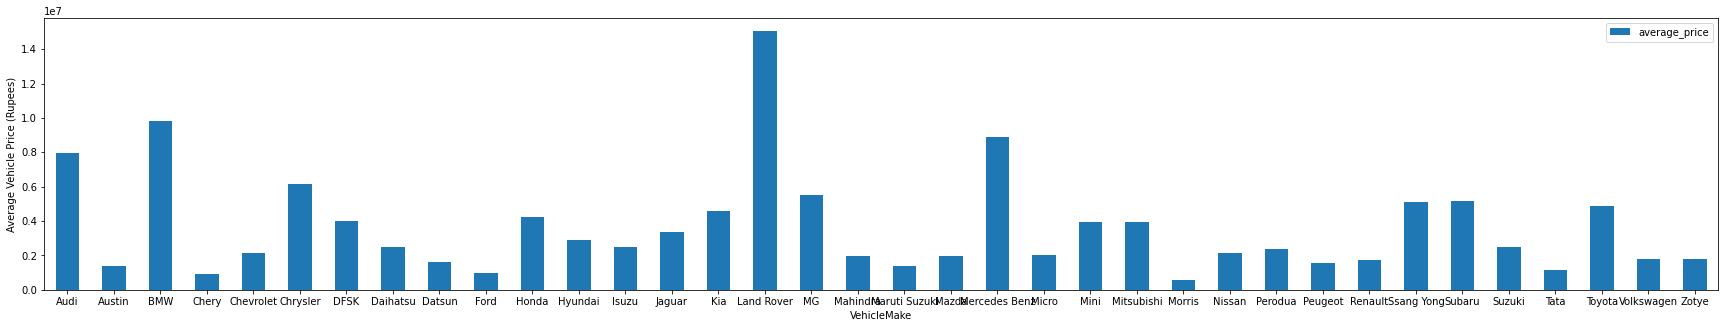

In [9]:
df_engine_avg_price = vehicle_data[['Make','Price']].groupby("Make", as_index = False).mean().rename(columns={'Price':'average_price'})
plt1 = df_engine_avg_price.plot(x = 'Make', kind='bar', sort_columns = True, legend = True, figsize = (30,5))
plt1.set_xlabel("VehicleMake")
plt1.set_ylabel("Average Vehicle Price (Rupees)")
xticks(rotation = 0)
plt.show()

Land Rover is the Most Expensive Vehicle Brand

**Number of unique vehicle models**

In [10]:
vehicle_data.Model.nunique()

169

In [11]:
vehicle_data.Year.min(), vehicle_data.Year.max()

(1940, 2021)

There are vehicles from 1940 to 2021 in the dataset

                                                Year Vs Prices

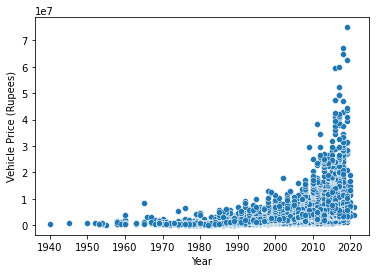

In [12]:
plt2 = sns.scatterplot(x = 'Year', y = 'Price', data = vehicle_data)
plt2.set_xlabel('Year')
plt2.set_ylabel('Vehicle Price (Rupees)')
plt.show()

The above graph shows that the higher the year, the higher the price

                                                   Fuel Type Vs Price

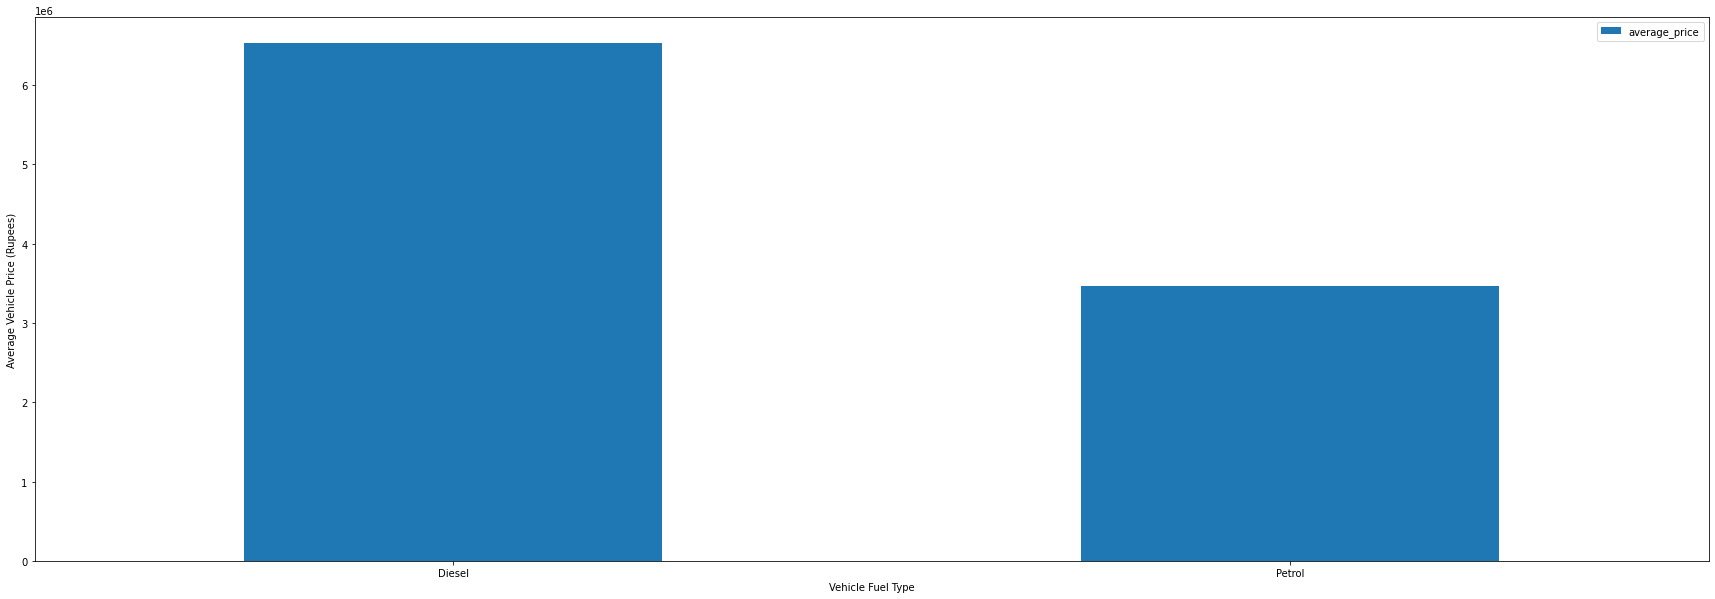

In [13]:
df_fueltype_avg_price = vehicle_data[['FuelType','Price']].groupby("FuelType", as_index = False).mean().rename(columns={'Price':'average_price'})
plt4 = df_fueltype_avg_price.plot(x = 'FuelType', kind='bar', sort_columns = True, legend = True, figsize = (30,10))
plt4.set_xlabel("Vehicle Fuel Type")
plt4.set_ylabel("Average Vehicle Price (Rupees)")
xticks(rotation = 0)
plt.show()

Vehicles that use Diesel/Petrol are the highest priced

                                             Mileage(Km) Vs Price(Rupees)

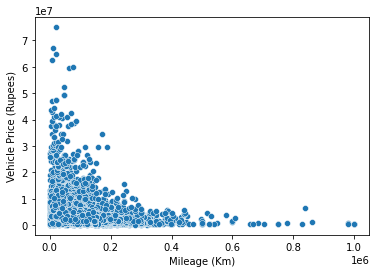

In [28]:
plt6 = sns.scatterplot(x = 'Mileage', y = 'Price', data = vehicle_data)
plt6.set_xlabel('Mileage (Km)')
plt6.set_ylabel('Vehicle Price (Rupees)')
plt.show()

The above graph shows that, lower the mileage, higher the price

<h3>Data Preprocessing</h3>

#### Remove the rows that contain missing values

In [29]:
vehicle_data = vehicle_data.dropna(how='any',axis=0)

In [30]:
vehicle_data.isnull().sum()

Make              0
Model             0
Year              0
Transmission      0
FuelType          0
EngineCapacity    0
Mileage           0
Price             0
dtype: int64

#### Remove duplicate rows (if any)

In [31]:
vehicle_data = vehicle_data.drop_duplicates()

#### Features of the model

In [32]:
features = ['Make', 'Model', 'Year', 'Transmission', 'FuelType', 'EngineCapacity', 'Mileage']
X = vehicle_data[features]

#### Target variable

In [33]:
y = vehicle_data.Price

#### Converting categorical data to numerical data

We will be using Label Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
# Make a copy of X
X_copy = X.copy()

label_encoder = LabelEncoder()

X_copy['Make'] = label_encoder.fit_transform(X['Make'].astype(str))
X_copy['Model'] = label_encoder.fit_transform(X['Model'].astype(str))
X_copy['Transmission'] = label_encoder.fit_transform(X['Transmission'].astype(str))
X_copy['FuelType'] = label_encoder.fit_transform(X['FuelType'].astype(str))

X = X_copy

In [36]:
X.head()


,Make,Model,Year,Transmission,FuelType,EngineCapacity,Mileage
0,0,10,2015,0,1,1000,42000
1,0,10,2015,0,1,1000,30000
2,0,10,2015,0,1,1000,40000
3,0,10,2015,0,1,1000,39000
4,0,10,2016,0,1,1000,25000


Splitting the data into training and validating data

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0, test_size = 0.2)

**Multiple Linear Regression**

In [27]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(train_X,train_y)

lr_pred = lr_model.predict(val_X)
print(lr_model.score(val_X, val_y))
print(lr_model.predict([[23,91,1980,1,7,1400,158000]]))

0.4473970152612232
[-1338159.4521113]


**Random Forest Model**

In [96]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(max_depth = 7, random_state = 1, n_estimators = 100)
rf_model.fit(train_X, train_y)

y_f = rf_model.predict(val_X)
print(rf_model.score(val_X, val_y))
print(rf_model.predict([[0,36,2016,0,2,1000,200000]]))

0.8499785046727755
[5238197.74921105]


In [65]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(train_X, train_y)
dt_pred = dt_model.predict(val_X)
print(dt_model.score(val_X, val_y))
print(dt_model.predict([[0,39,2005,1,2,1600,200000]]))

0.034858387799564274
[2700000]


In [ ]:
Gradient Boost Model

In [97]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor()

gb_model.fit(train_X, train_y)
gb_pred = gb_model.predict(val_X)

print(gb_model.score(val_X, val_y))
print(gb_model.predict([[0,36,2016,0,2,1000,200000]]))

0.8441580767960886
[6543139.20010769]


In [ ]:
KNeighborsRegressor Model

In [55]:
from sklearn.neighbors import KNeighborsRegressor

kn_model = KNeighborsRegressor()

kn_model.fit(train_X, train_y)
kn_pred = kn_model.predict(val_X)

print(kn_model.score(val_X, val_y))
print(kn_model.predict([[0,39,2004,0,2,1400,195000]]))

0.47307001311159214
[2116000.]


In [54]:
from sklearn.ensemble import AdaBoostRegressor

ab_model = AdaBoostRegressor();

ab_model.fit(train_X, train_y)
ab_pred = ab_model.predict(val_X)

print(ab_model.score(val_X, val_y))
print(ab_model.predict([[0,39,2004,0,2,1400,195000]]))

0.3845557666229281
[4766231.06882591]
